# 2019 all Bollywood Movie EDA


## What can we do with All Bollywood Movies 2019 Dataset?

### •	This dataset contain More Variety of Data for Visualization
### •	To learn work of Separating of Data from columns and Time format functions
### •	Scope for Univariate Analysis of Different features of the Data.


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from datetime import datetime
import calendar
from scipy import stats
import pandas as pd
import seaborn as sns
sns.set(style="white", context="talk")
file=pd.read_csv('C:/datalake/project_2019_indian_movies/2019_Movies.csv')
file.head(3)

C:\Users\Pavano\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Movie_name,Actors,Crtitic_ratings,Release date & duration,User_ratings,Language,Movie_type
0,Good Newwz,"Akshay Kumar, Kareena Kapoor, Diljit Dosanjh, ...",3.5,27 Dec 2019 | 2 hrs 14 mins,3.4,Hindi,"Comedy, Drama | UA"
1,Dabangg 3,"Salman Khan, Sonakshi Sinha, Arbaaz Khan, Kich...",3.0,20 Dec 2019 | 2 hrs 23 mins,3.2,"Hindi, Telugu, Kannada, Tamil","Action, Romance, Thriller | UA"
2,Sound Of Water,"Ramesh Goyal, Chetan Sharma, Abraam Pandey, Ja...",3.4,13 Dec 2019 | 2 hrs 25 mins,NaN,Hindi,Drama


#### Spliting Release Date and Duration

In [2]:
timestamp=file['Release date & duration'].str.split("|", n=3,expand=True)
timestamp['date']=timestamp[0]
timestamp['date'] = pd.to_datetime(timestamp['date'])
timestamp['Duration']=timestamp[1]
timestamp.drop(columns =[0,1], inplace = True) 
file.drop(columns =['Release date & duration'], inplace = True) 
timestamp.sample(3)

,date,Duration
214,2019-01-11,2 hrs 12 mins
150,2019-04-05,2 hrs 21 mins
110,2019-06-14,1 hr 26 mins


#### Converting Duration of Runtime into separate Columns.

In [3]:
duration=timestamp['Duration'].str.split(" ", n=4,expand=True)
duration['hr']=duration[1].astype(int)
duration['hr']=duration['hr']*60
duration['min']=duration[3].astype(int)
duration['Duration']=duration['min'].add(duration['hr']) 
duration.drop(columns =[0,1,2,3,4,'hr','min'], inplace = True) 
timestamp.drop(columns =['Duration'], inplace = True)
duration.sample(3)

,Duration
115,115
21,128
55,110


#### Converting Release date into specific format

In [4]:
timestamp['Month'] = timestamp['date'].dt.month 
def mapper(month):
    return month.strftime('%b') 
timestamp['Monthname']= timestamp['date'].apply(mapper)
timestamp['Day'] = timestamp['date'].dt.day
timestamp['Weekday']= timestamp['date'].dt.day_name()
timestamp.drop(columns =['date'], inplace = True) 
timestamp.sample(3)

,Month,Monthname,Day,Weekday
214,1,Jan,11,Friday
167,3,Mar,15,Friday
106,6,Jun,21,Friday


#### Making Diffrent Columns for Movie type & Certification.

In [5]:
movie_type=file['Movie_type'].str.split("|", n=1,expand=True)
movie_type['Category']=movie_type[0]
movie_type['Certification']=movie_type[1].replace('UA',' UA')
movie_type.drop(columns =[0,1], inplace = True) 
movie_type.sample(3)

,Category,Certification
144,"Drama, Mystery, Thriller",UA
43,"Horror, Thriller",A
115,No Information,None


## Now Dataframe is ready for Visualization...

In [6]:
df = pd.concat([file,duration,timestamp,movie_type], axis=1)
df.drop(columns =['Movie_type'], inplace = True) 
df.head(3)

,Movie_name,Actors,Crtitic_ratings,User_ratings,Language,Duration,Month,Monthname,Day,Weekday,Category,Certification
0,Good Newwz,"Akshay Kumar, Kareena Kapoor, Diljit Dosanjh, ...",3.5,3.4,Hindi,134,12,Dec,27,Friday,"Comedy, Drama",UA
1,Dabangg 3,"Salman Khan, Sonakshi Sinha, Arbaaz Khan, Kich...",3.0,3.2,"Hindi, Telugu, Kannada, Tamil",143,12,Dec,20,Friday,"Action, Romance, Thriller",UA
2,Sound Of Water,"Ramesh Goyal, Chetan Sharma, Abraam Pandey, Ja...",3.4,NaN,Hindi,145,12,Dec,13,Friday,Drama,None


## 1. Movie Runtime Duration Distribution

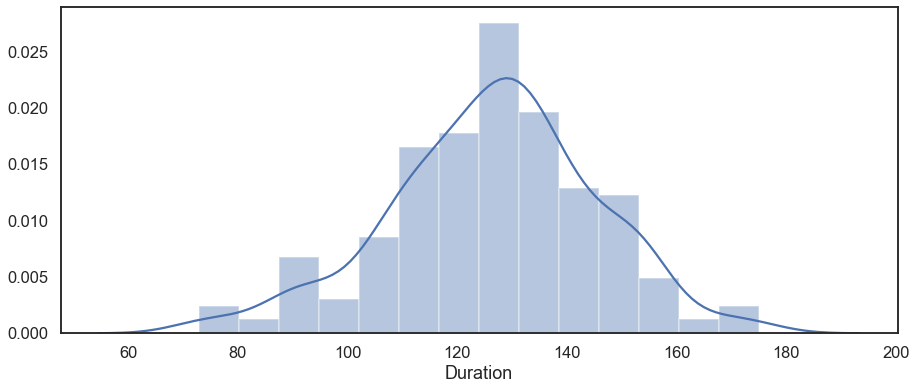

In [7]:
plt.figure(figsize=(15,6))
ax = sns.distplot(df['Duration'])

## Wow!!! Movie runtime Exactly Normally Distributed!!!

## 2. Distribution of User Ratings vs Critic Ratings

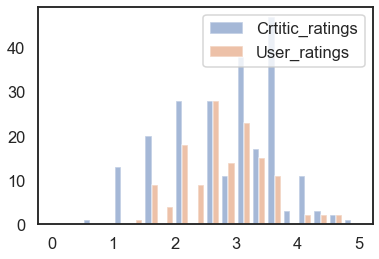

<Figure size 72x72 with 0 Axes>

In [8]:
plt.hist([df['Crtitic_ratings'],df['User_ratings']], bins= 20, range=[0,5], alpha=0.5, label=['Crtitic_ratings', 'User_ratings'])
plt.legend(loc='upper right')
fig = plt.figure(figsize=(1,1))
plt.show()

## Ohhh!!!March is the month of most film were released!!!

### 4. Movies released with Days of all months 

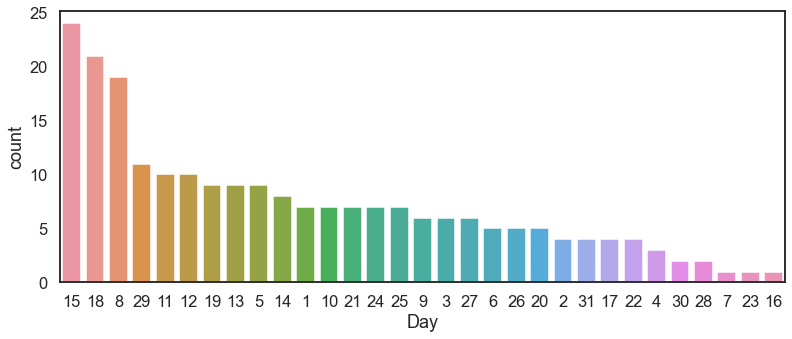

In [9]:
plt.figure(figsize=(13,5))
p = sns.countplot(data=df, x = 'Day',order = df['Day'].value_counts().index)

## 5. WeekDay wise Released Movie

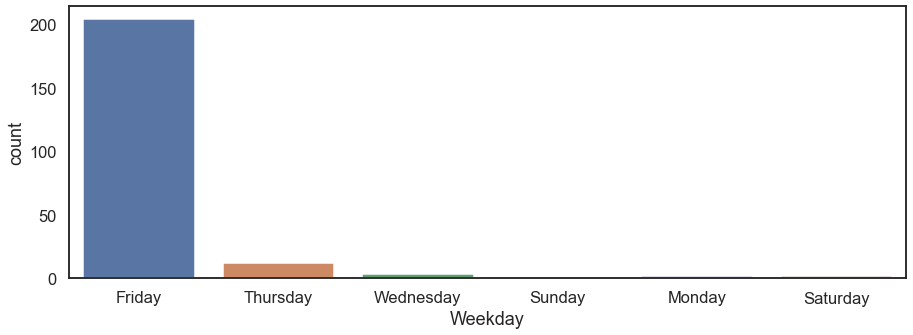

In [10]:
# releaseday
plt.figure(figsize=(15,5))
p = sns.countplot(data=df, x = 'Weekday')

## Maximum Movies Released on Friday...

## 6. Certification of Movies

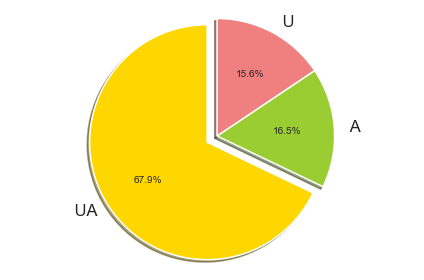

In [11]:
# certification 
x2=df['Certification'].value_counts(ascending=False)
df2=pd.DataFrame(x2)
df2.reset_index(inplace=True)
df2.columns = ['Certification','Count']
labels = df2['Certification']
sizes = df2['Count']

fig1, ax1 = plt.subplots()
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0) 
ax1.pie(sizes,explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

## 7. Association between Movie Ratings of Critic and User 

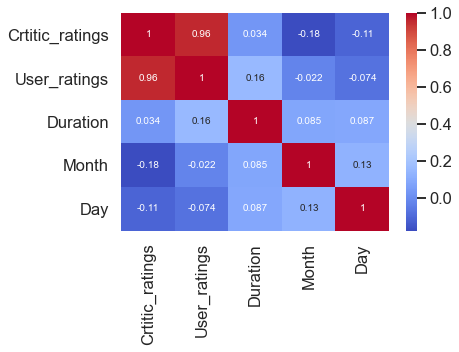

In [12]:
# relation betn cretic and user ratings
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

## 8. Movie Type Cumulative

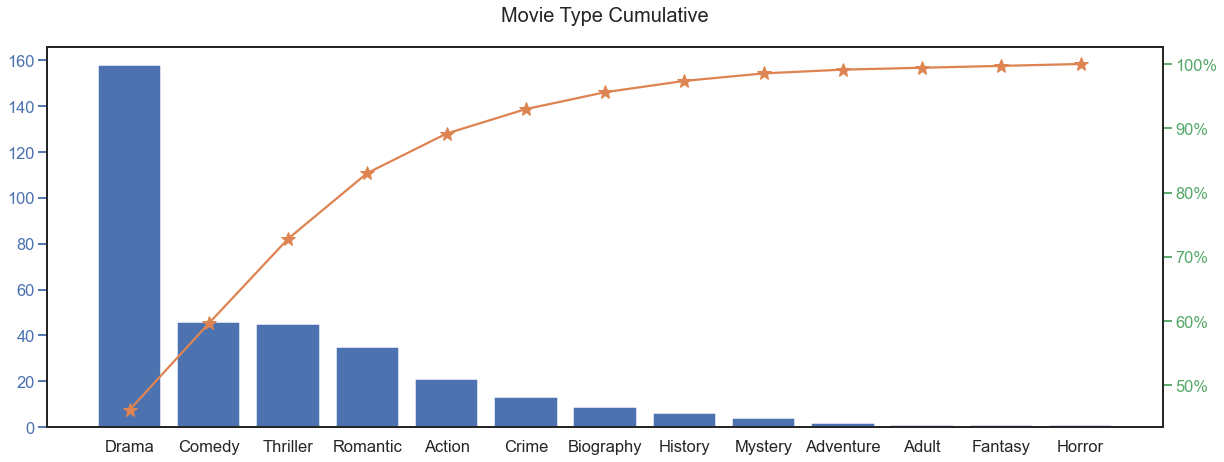

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
df_type_pie = df_type_pie.sort_values(by='Count',ascending=False)
df_type_pie["cumpercentage"] = df_type_pie["Count"].cumsum()/df_type_pie["Count"].sum()*100
fig, ax = plt.subplots()
fig.set_size_inches(20,7)
ax.bar(df_type_pie['Type'], df_type_pie["Count"], color="C0")
ax2 = ax.twinx()
ax2.plot(df_type_pie['Type'], df_type_pie["cumpercentage"], color="C1", marker="*", ms=15)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C2")
ax.axes.set_title("Movie Type Cumulative", fontsize=20, y=1.05);
plt.show()

## 9. Movie released in other Indian Languages

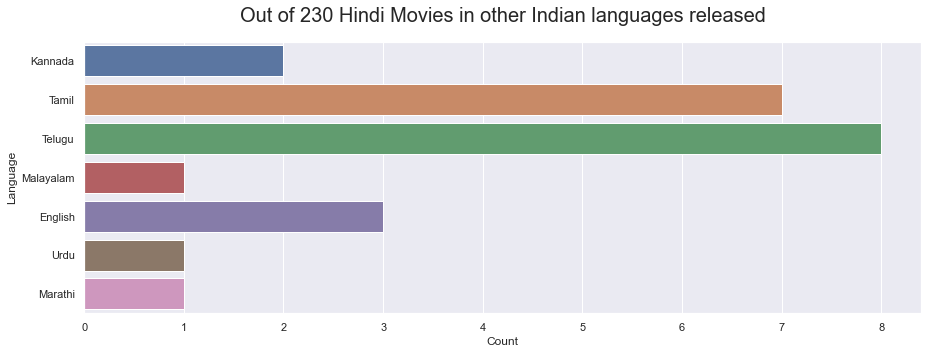

In [62]:
df4=df['Language'].str.split(",", n=4,expand=True)
df4 = df4.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
ls2=[ 'Kannada',None, 'Tamil', 'Telugu', 'Malayalam', 'English','Hindi','nan', 'Urdu', 'Marathi']
d={}
for i in ls2:
    s=df4[df4==i].count().sum()
    d[i]=s
df_lang=pd.DataFrame(d.items(), columns=['Language', 'Count'])
df_lang
df_lang.drop([1,7,6], inplace=True)
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
#sns.set_context("talk")
ax = sns.barplot(x=df_lang['Count'], y=df_lang['Language'], data=df_lang, orient='h', saturation=0.7)
ax.axes.set_title("Out of 230 Hindi Movies in other Indian languages released", fontsize=20, y=1.05);

## 10.Telugu movies are Dubbing mostly...

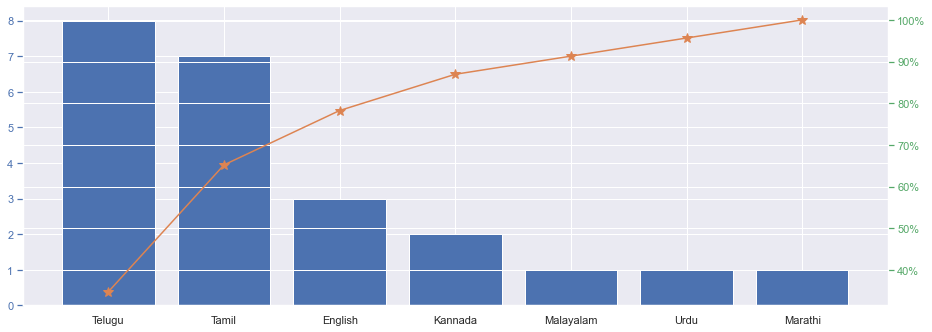

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
df_lang = df_lang.sort_values(by='Count',ascending=False)
df_lang["cumpercentage"] = df_lang["Count"].cumsum()/df_lang["Count"].sum()*100
fig, ax = plt.subplots()
ax.bar(df_lang['Language'], df_lang["Count"], color="C0")
ax2 = ax.twinx()
ax2.plot(df_lang['Language'], df_lang["cumpercentage"], color="C1", marker="*", ms=10)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C2")
fig.set_size_inches(15.5, 5.5)
plt.show()

## 10. Who is Maximum and Minimum?

In [72]:
print('Movie of Maximum ratings by Critics 👇')
df[df['Crtitic_ratings']==df['Crtitic_ratings'].max()]

Movie of Maximum ratings by Critics 👇


,Movie_name,Actors,Crtitic_ratings,User_ratings,Language,Duration,Month,Monthname,Day,Weekday,Category,Certification
196,Umakant Pandey Purush Ya ... ?,"ShivangiSingh,AjeetSingh,ShrikantKaranjgaonkar...",4.8,NaN,Hindi,100,2,Feb,1,Friday,Drama,UA


In [73]:
print('Movie of Minimum ratings by Critics 👇')
df[df['Crtitic_ratings']==df['Crtitic_ratings'].min()]

Movie of Minimum ratings by Critics 👇


,Movie_name,Actors,Crtitic_ratings,User_ratings,Language,Duration,Month,Monthname,Day,Weekday,Category,Certification
108,Rescue,"RaniAgrawal,BrijendraKala,SreejitaDe,RahulGane...",0.5,1.3,Hindi,152,6,Jun,14,Friday,"Drama, Thriller",A


In [74]:
print('Movie of Maximum ratings by User 👇')
df[df['User_ratings']==df['User_ratings'].max()]

Movie of Maximum ratings by User 👇


,Movie_name,Actors,Crtitic_ratings,User_ratings,Language,Duration,Month,Monthname,Day,Weekday,Category,Certification
219,URI: The Surgical Strike,"VickyKaushal,YamiGautam,KirtiKulhari,Vikramjee...",4.0,4.7,Hindi,138,1,Jan,11,Friday,"Drama, Action, War",UA


In [75]:
print('Movie of Minimum ratings by User 👇')
df[df['User_ratings']==df['User_ratings'].min()]

Movie of Minimum ratings by User 👇


,Movie_name,Actors,Crtitic_ratings,User_ratings,Language,Duration,Month,Monthname,Day,Weekday,Category,Certification
108,Rescue,"RaniAgrawal,BrijendraKala,SreejitaDe,RahulGane...",0.5,1.3,Hindi,152,6,Jun,14,Friday,"Drama, Thriller",A


In [76]:
print('Logest Runtime Movie 👇')
df[df['Duration']==df['Duration'].max()]

Logest Runtime Movie 👇


,Movie_name,Actors,Crtitic_ratings,User_ratings,Language,Duration,Month,Monthname,Day,Weekday,Category,Certification
106,Kabir Singh,"ShahidKapoor,KiaraAdvani,ArjanBajwa,SureshOber...",3.5,3.5,Hindi,175,6,Jun,21,Friday,"Drama, Action, Romance",A


In [77]:
print('Shortst Runtime Movie 👇')
df[df['Duration']==df['Duration'].min()]

Shortst Runtime Movie 👇


,Movie_name,Actors,Crtitic_ratings,User_ratings,Language,Duration,Month,Monthname,Day,Weekday,Category,Certification
129,Grihalakshmi: The Awakening,ShriMatajiNirmalaDevi,3.4,NaN,Hindi,73,5,May,10,Friday,Drama,U
198,Picture Ki Cheerphad `Papi Gudia',GauravKapoor,2.1,NaN,Hindi,73,2,Feb,1,Friday,Comedy,UA


## 11. Sharma,Khan,Singh are Surnames Leading Industry now!!!

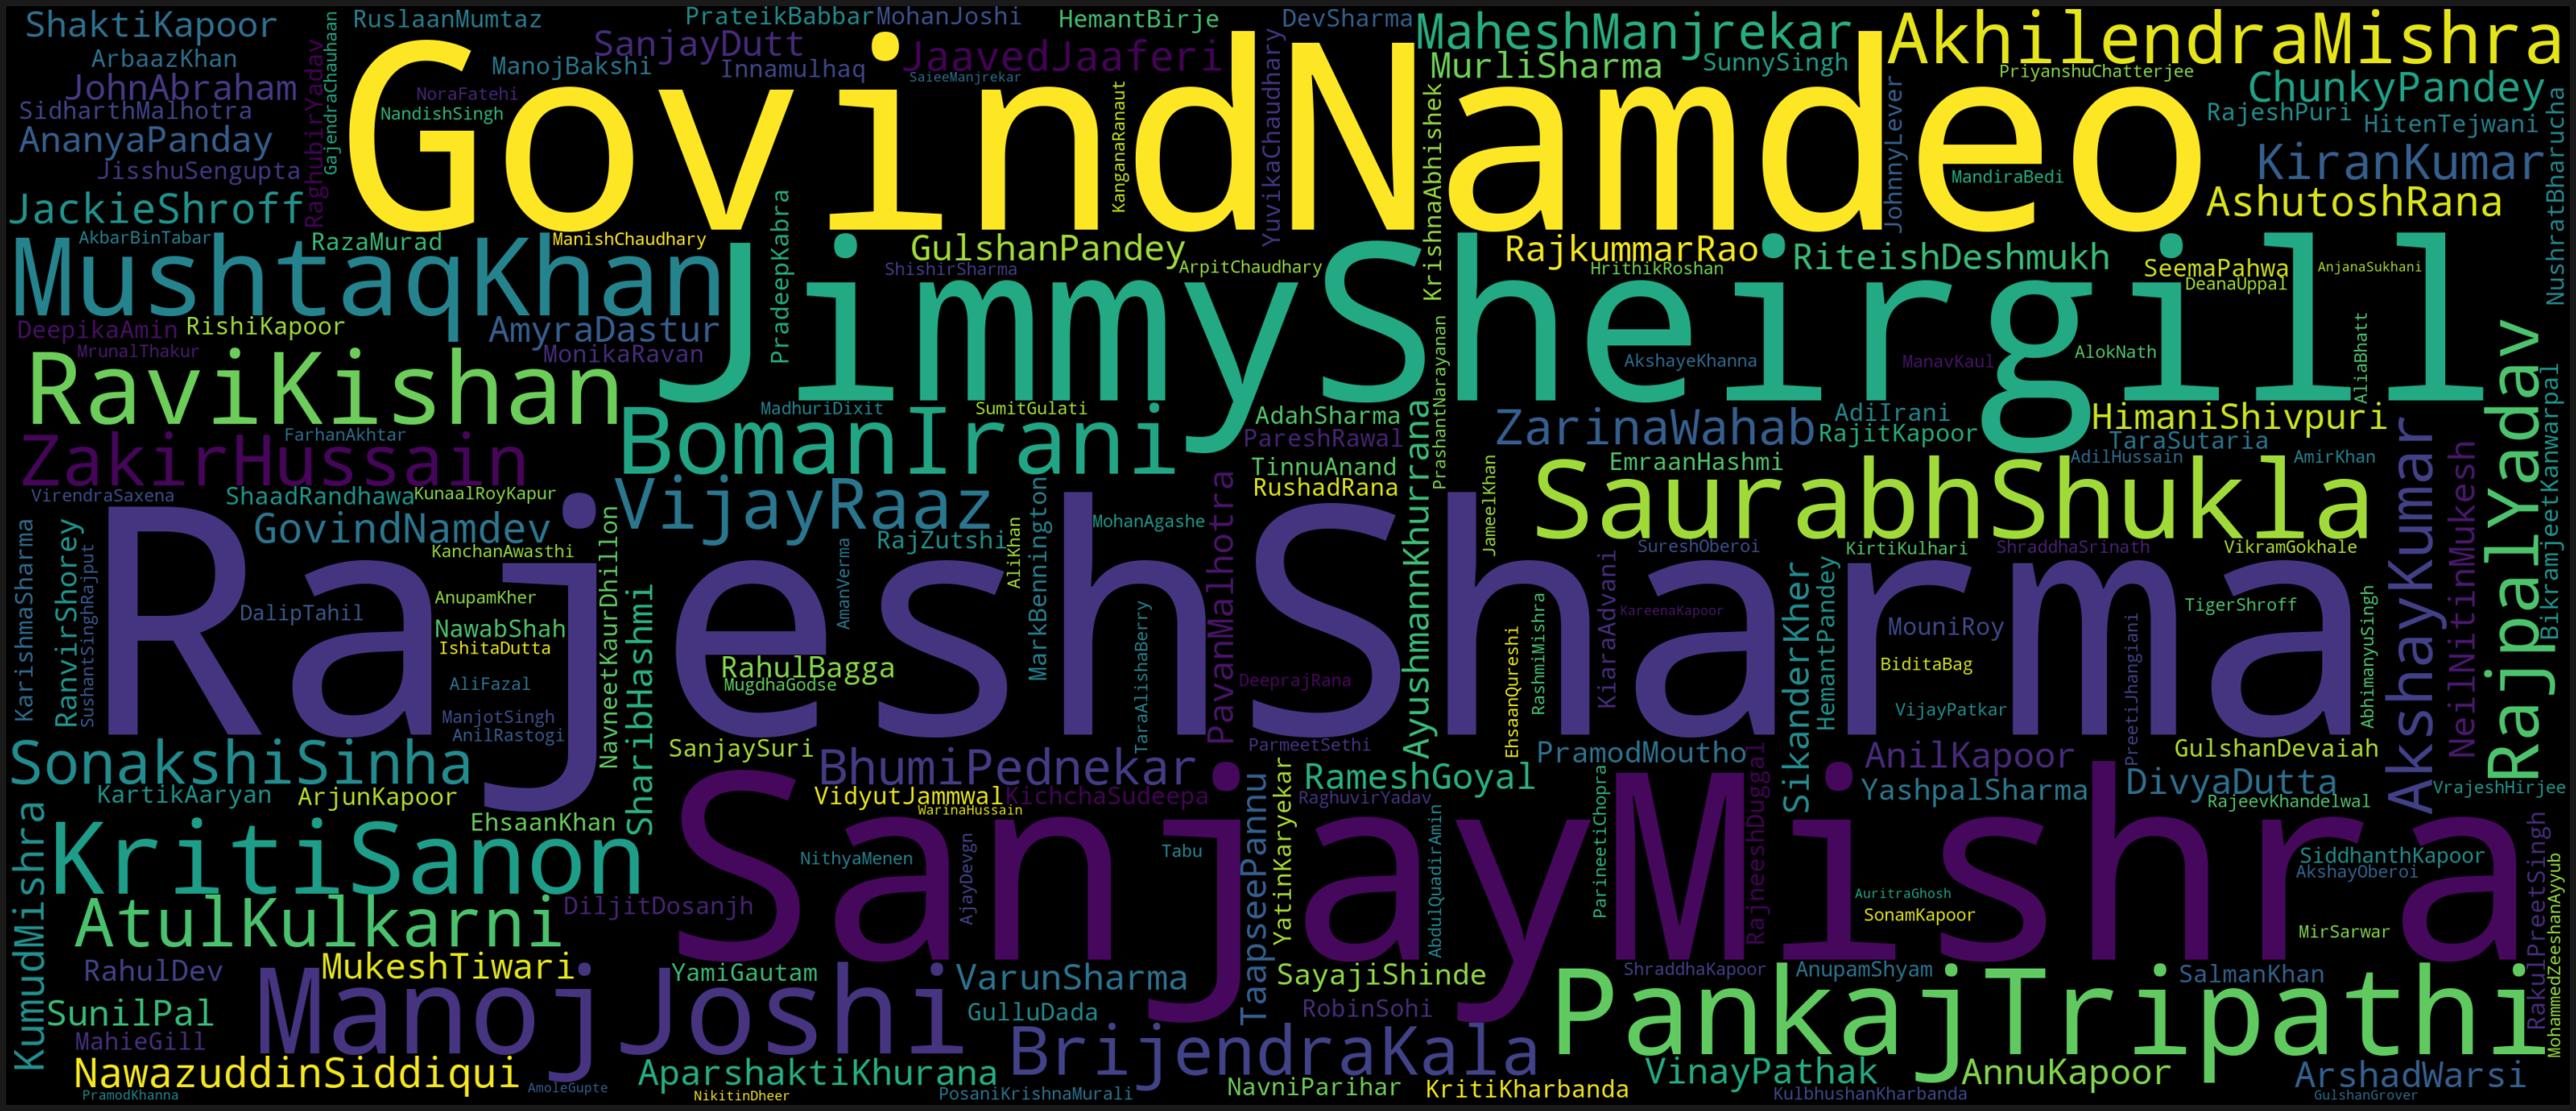

In [69]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
df['Actors'] = df['Actors'].astype(str)
df.head()
text = df.Actors.values
text = " ".join(df.Actors.values)
wordcloud = WordCloud(
    width = 3500,
    height = 1500,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## 12. Actors of the Year

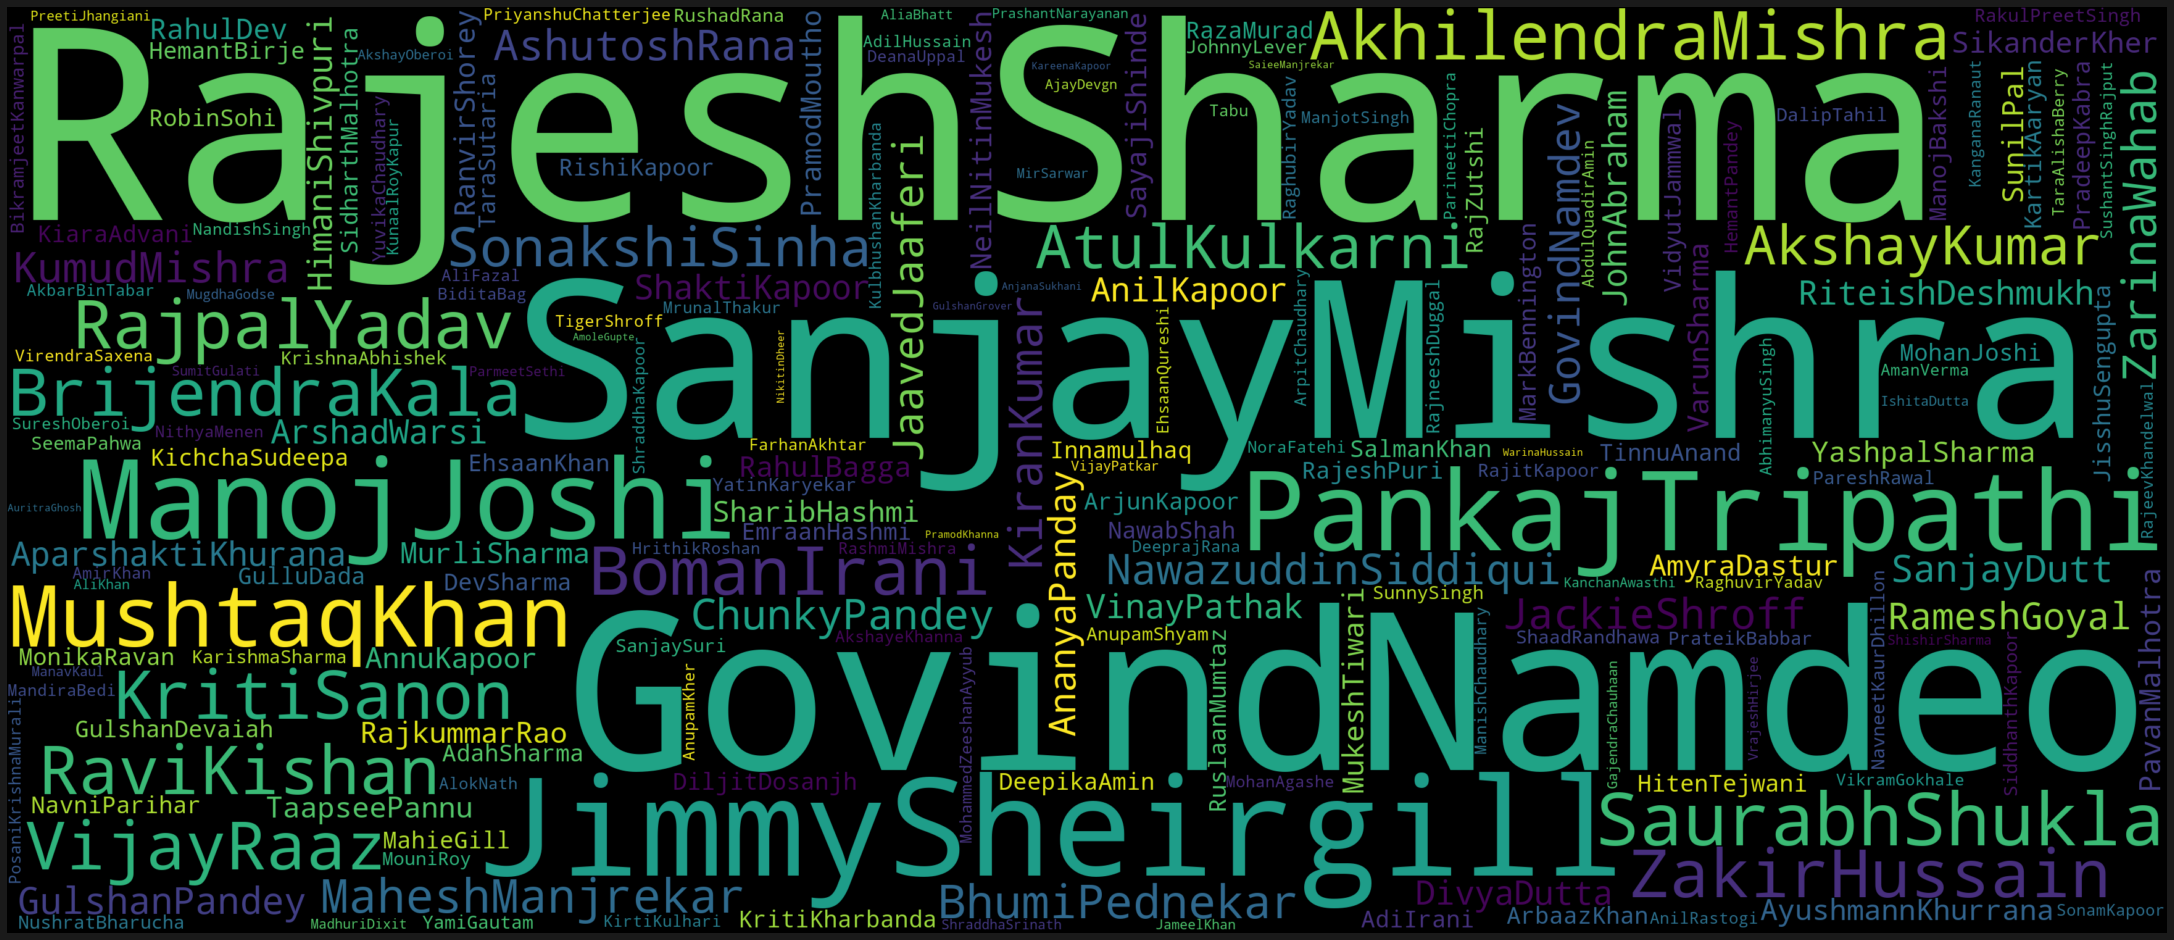

In [70]:
df['Actors'] = df['Actors'].str.replace(" ","")
text = df.Actors.values
text = " ".join(df.Actors.values)
wordcloud = WordCloud(
    width = 3500,
    height = 1500,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## 13. Actors who played more roles in 2019...

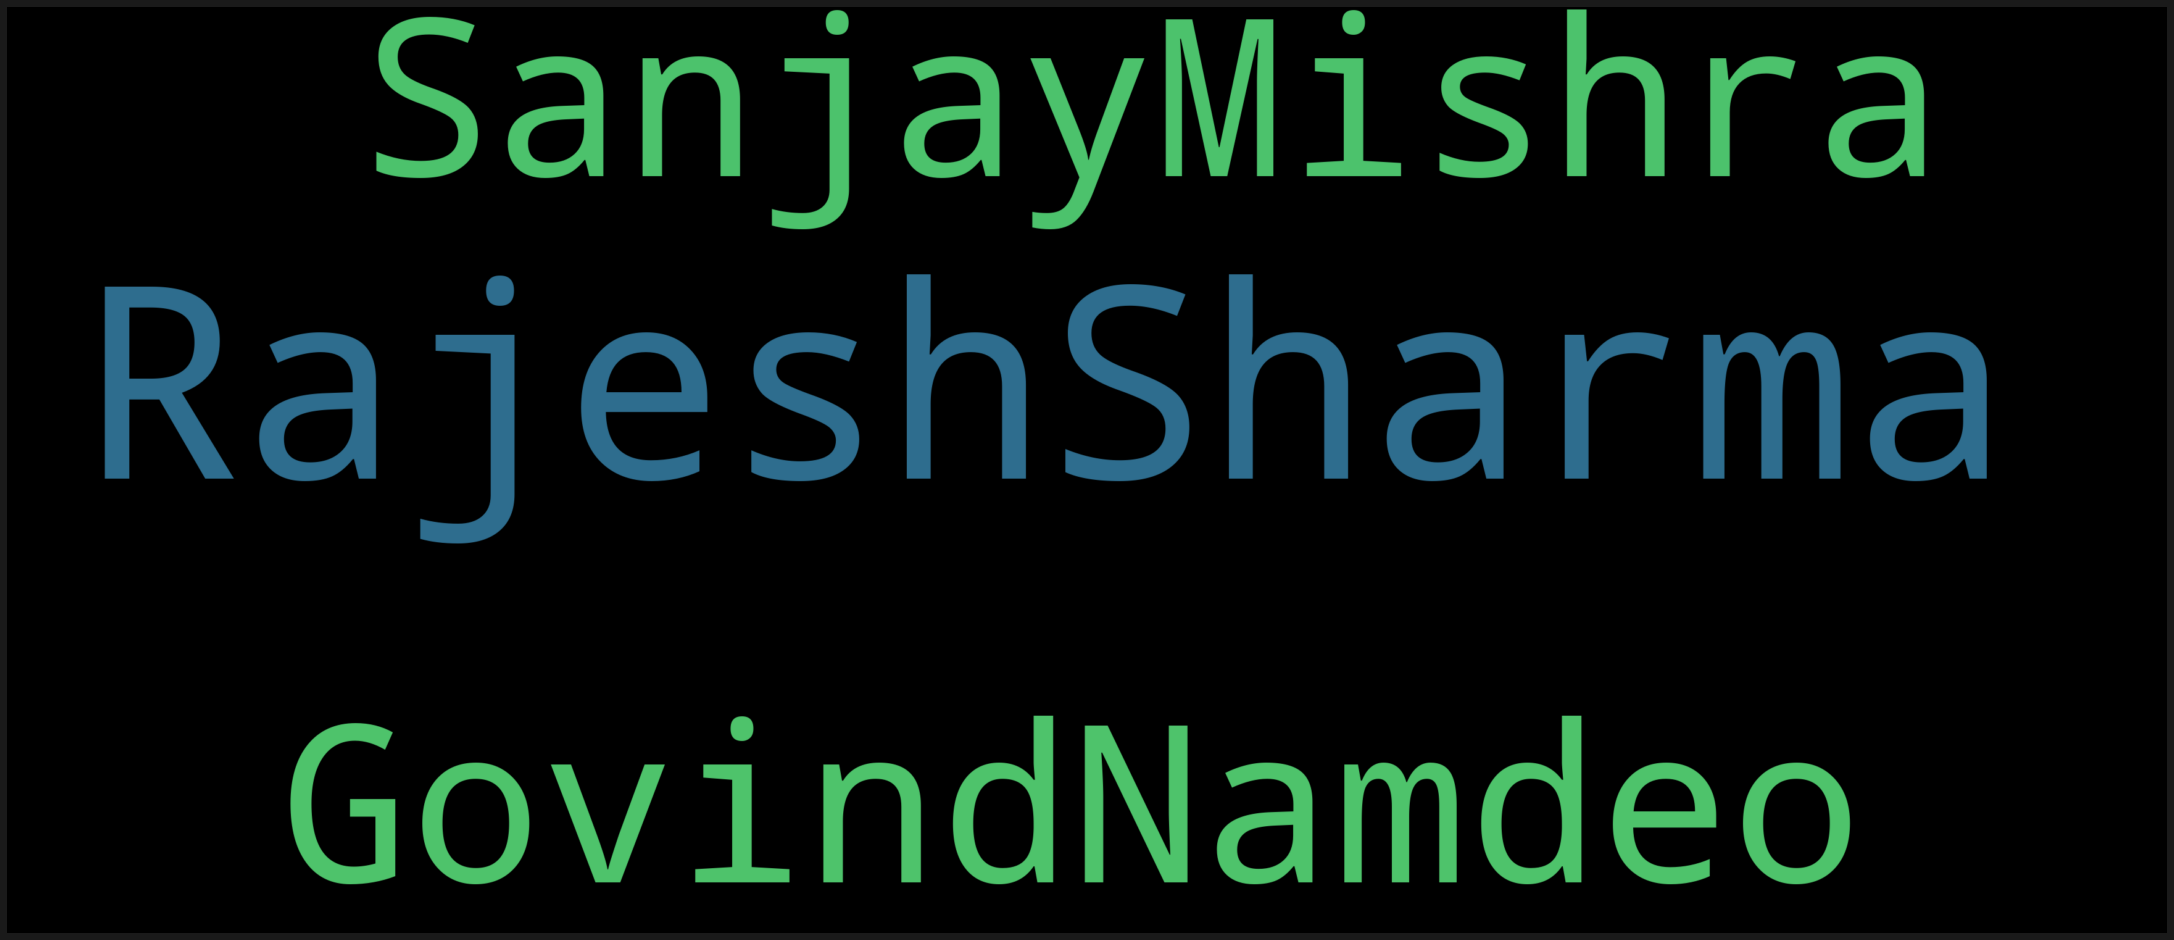

In [71]:
df['Actors'] = df['Actors'].str.replace(" ","")
text = df.Actors.values
text = " ".join(df.Actors.values)
wordcloud = WordCloud(
    width = 3500,
    height = 1500,
    background_color = 'black',max_words=3,
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## End of Notebook....